## Data Cleaning

In [21]:
# import all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
"""TO READ FILE"""
import os
os.chdir(r"C:\Users\Deonne\OneDrive - Nanyang Technological University\Desktop\Y2S1\Biohackathon")
#os.chdir(r"path")
print("Current working directory is:", os.getcwd())

Current working directory is: C:\Users\Deonne\OneDrive - Nanyang Technological University\Desktop\Y2S1\Biohackathon


In [23]:
# reading the data
cc_data = pd.read_csv("cervical-cancer_csv.csv")

In [ ]:
cc_data.head()

In [ ]:
cc_data.shape

In [ ]:
cc_data.info()

In [ ]:
cc_data.columns

Meaning of the columns:

In [24]:
# checking for any NULL values
cc_data.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

CLEAN DATA BASED ON COLUMN TYPE

In [25]:
binary_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
    'STDs:condylomatosis', 'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

duration_cols = [
    'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)',
    'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]

num_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]

try:
    cc_data[binary_cols] = cc_data[binary_cols].fillna(0)
    cc_data[duration_cols] = cc_data[duration_cols].fillna(0)

    # Fill numerical columns with median 
    for col in num_cols:
        if col in cc_data.columns:
            cc_data[col].fillna(cc_data[col].median(), inplace=True)

    # shows unique values of isna, will show if there are still columns with missing values
    print(cc_data.isna().any().unique())

except Exception as e:
    # exception handling
    print(f"An error occurred while filling missing data: {e}")

[False]


C:\Users\Deonne\AppData\Local\Temp\ipykernel_19452\3841335598.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cc_data[col].fillna(cc_data[col].median(), inplace=True)
C:\Users\Deonne\AppData\Local\Temp\ipykernel_19452\3841335598.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [26]:
# finding duplicated data
dup = cc_data.duplicated().sum()
print(f"Number of duplicated rows: {dup}")

# dropping duplicates
cc_data.drop_duplicates(inplace=True)

Number of duplicated rows: 15


In [27]:
unique_values = cc_data.apply(lambda x: x.unique())
print(unique_values)

Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, 7.0, 15.0, 8.0,...
First sexual intercourse              [15.0, 14.0, 17.0, 16.0, 21.0, 23.0, 26.0, 20....
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, 8.0, 7.0, 0.0, ...
Smokes                                                                       [0.0, 1.0]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, 18.0...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                      [0.0, 1.0]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                          [0.0, 1.0]
IUD (years)                           [0.0, 7.0, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 19.0...
STDs                            

In [28]:
# dropping those columns with only 0 as the unqiue value as they have no use in identifying the cancer 
zero_cols = cc_data.columns[(cc_data == 0).all()]
print("Columns with only 0:", list(zero_cols))

cc_data = cc_data.drop(columns=zero_cols)

Columns with only 0: ['STDs:cervical condylomatosis', 'STDs:AIDS']


from the unique values above, we can see that columns `STDs:condylomatosis` and `STDs:AIDS` only have the unique value of `0`. Thus their correlation cannot be plotted in the heatmap as shown below

# EDA (Exploratory Data Analysis)

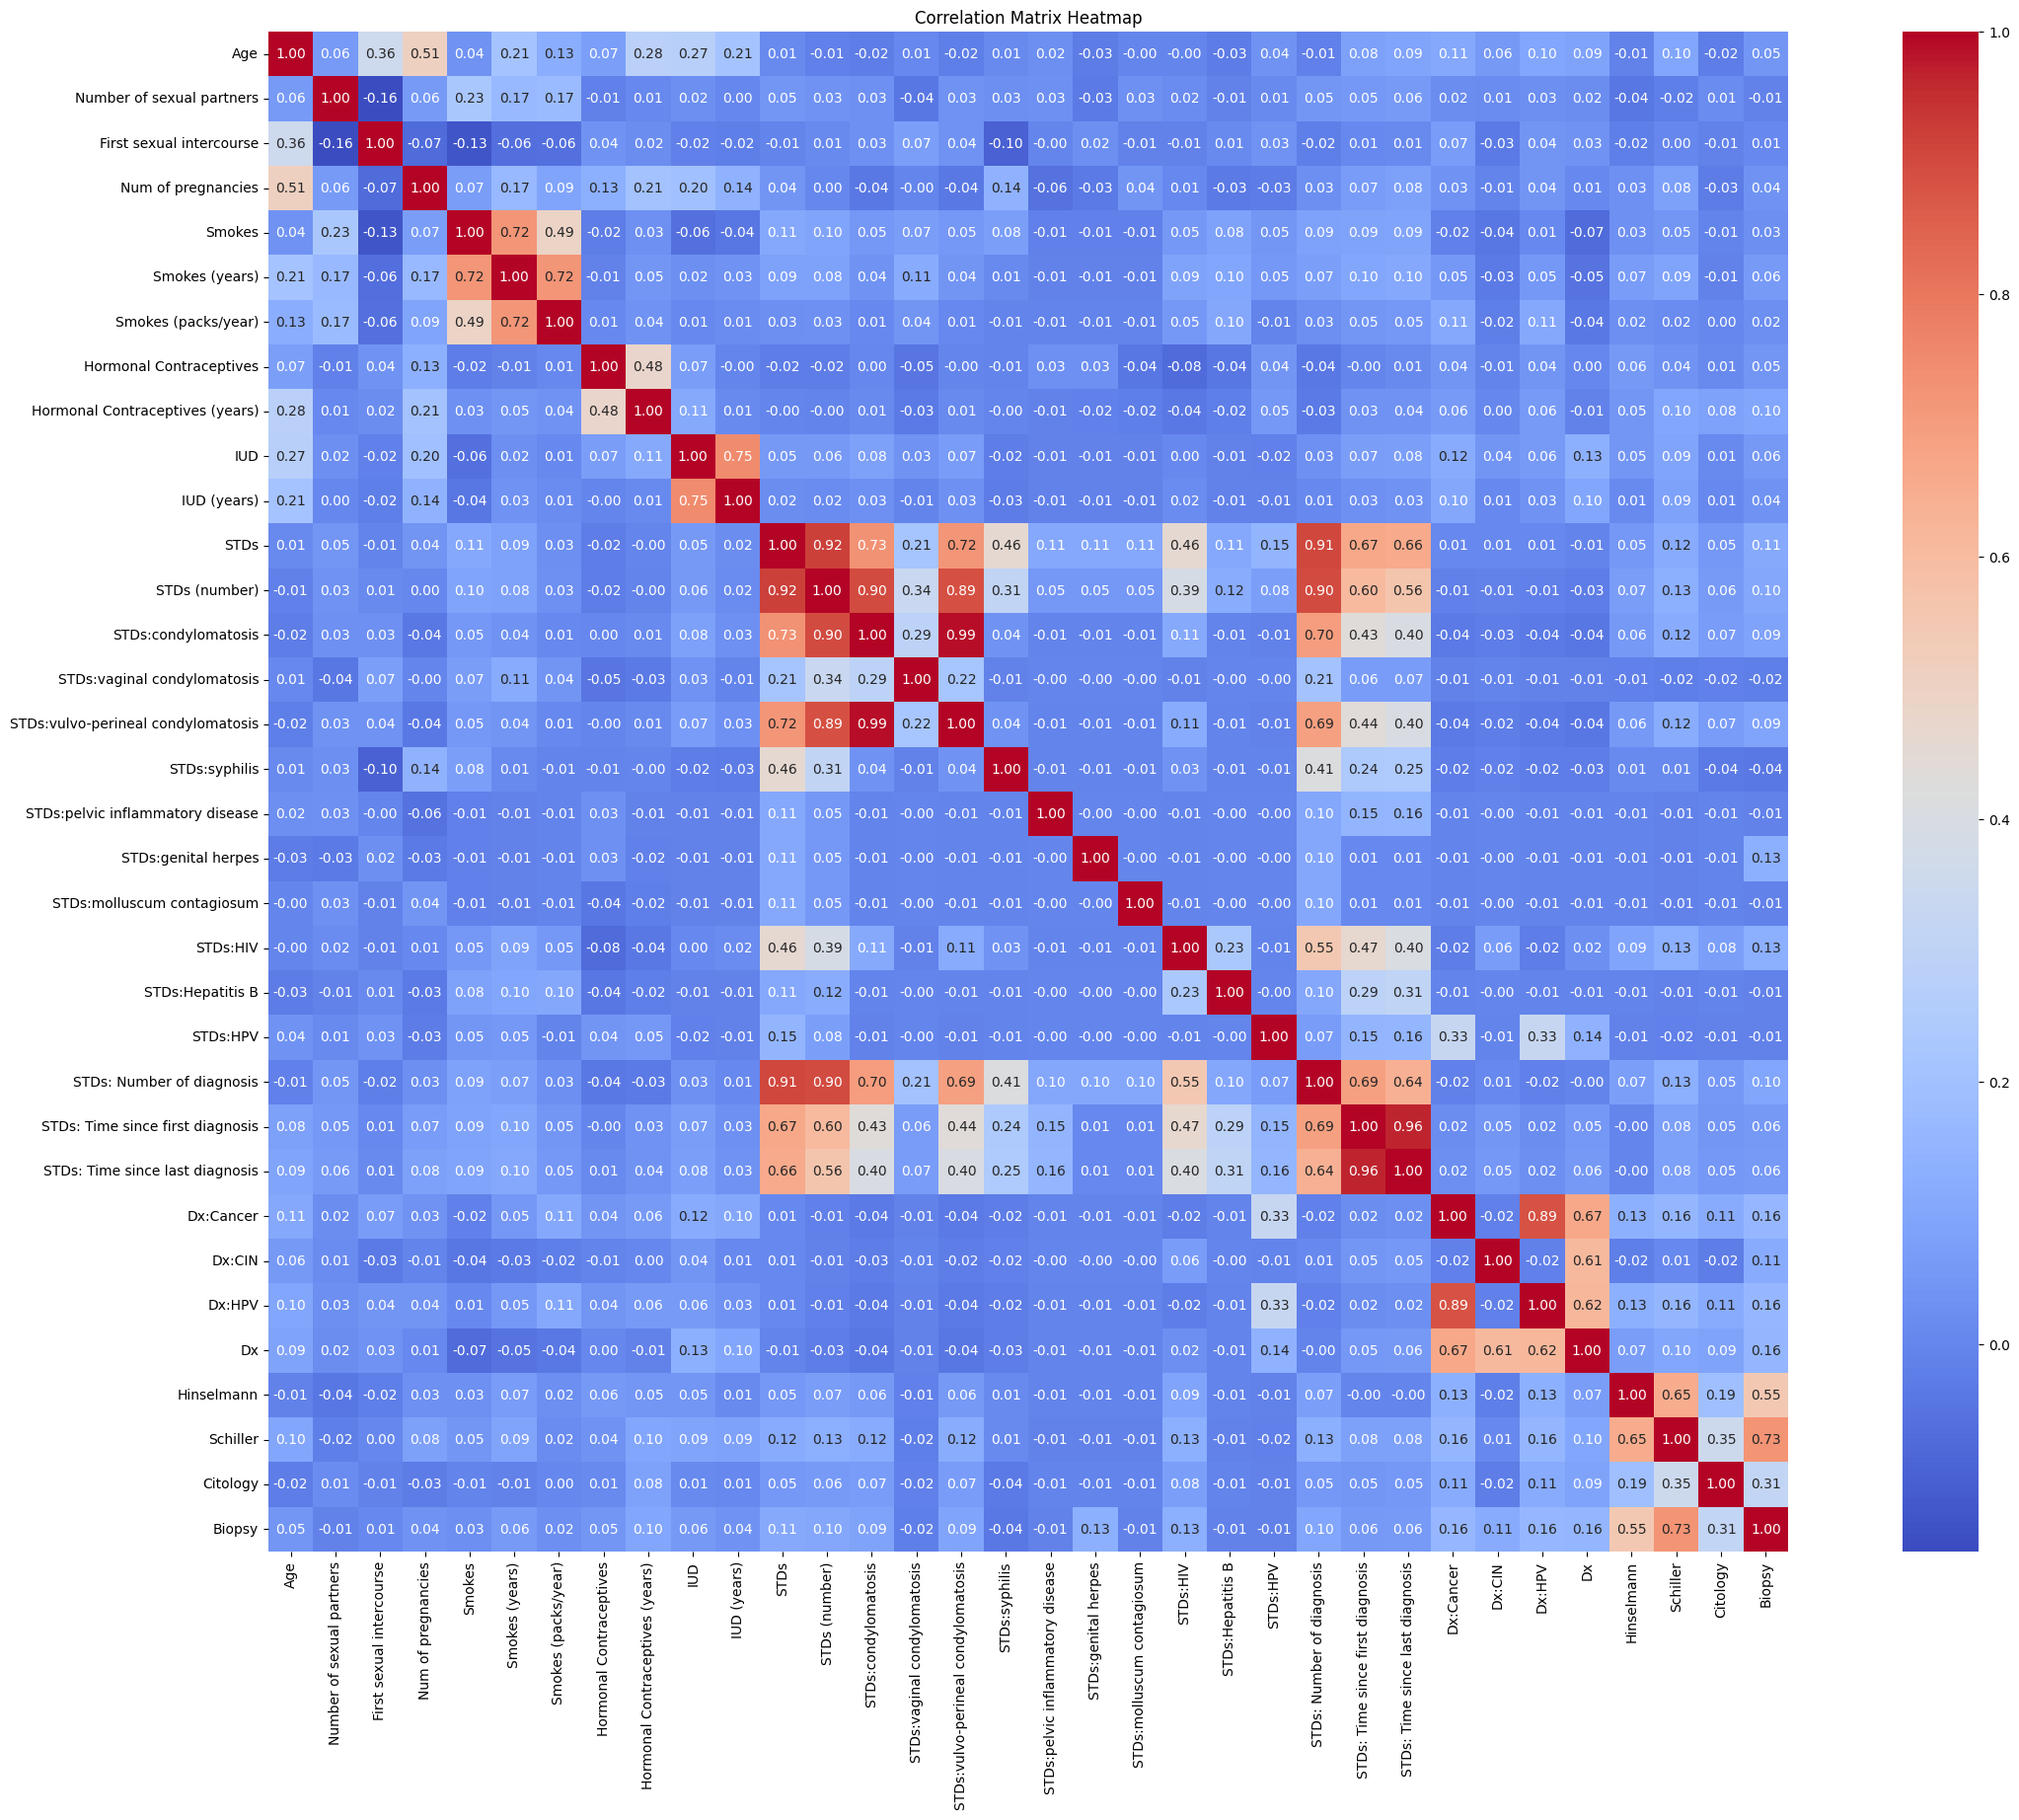

In [29]:
# plotting correlation matrix (determining the weight of each factor)

corr = cc_data.corr()

# Plot heatmap
plt.figure(figsize=(30,20))
sns.heatmap(
    corr,
    annot=True,       # Show numbers
    cmap="coolwarm",  # Color map
    fmt=".2f",        # Format numbers to 2 decimals
    mask=None,        # Do NOT hide upper/lower triangle
    cbar=True,        # Show color bar
    square=True      # Make cells square for readability
)
plt.title("Correlation Matrix Heatmap")
plt.show()

observing the correlation heatmap, we are only focusing on the `Dx:Cancer` column as it is the target variable that we are using 

possible columns to use: (closer to 1 the better)
- `Dx:HPV` - 0.89 
- `Dx` - 0.67 
- `STD:HPV` - 0.33

From these columns, we can observe that HPV is highly correlated to the cancer outcome

Meaning of the columns

`

`Hinselmann`, `Schiller` - tests taken specifically on the cervix

`Citology`, `Biopsy` - tests taken generally to test for cancerous cells 

Next Steps: determining the columns relationship with `Dx:Cancer`

## Patients diagnosed with cancer
Studying the data on patients diagnosed with cancer - `Dx:Cancer` = 1

In [30]:
pwc_data = cc_data[cc_data["Dx:Cancer"] == 1]

### non-binary cols

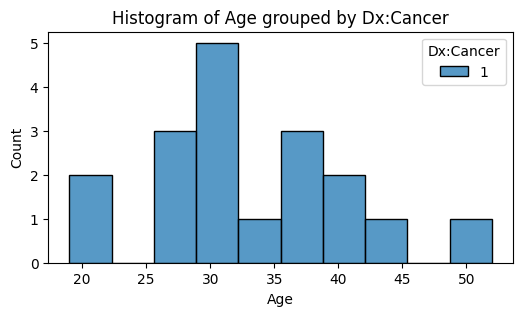

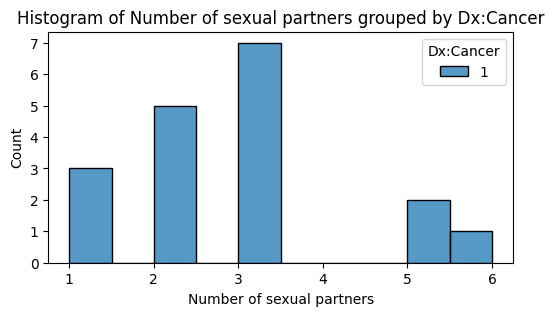

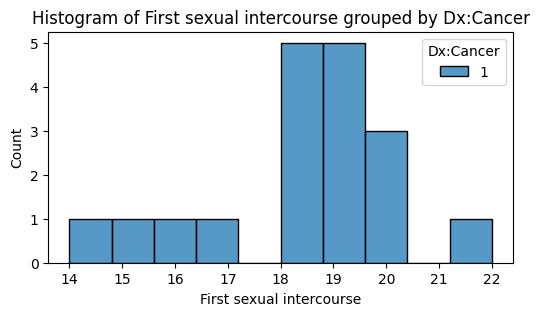

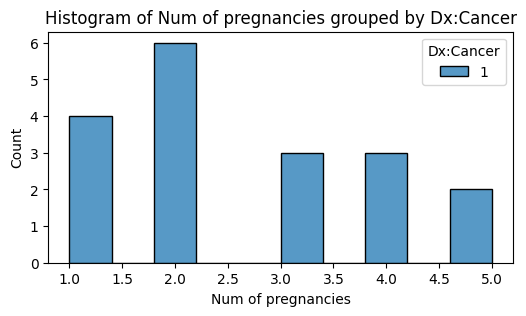

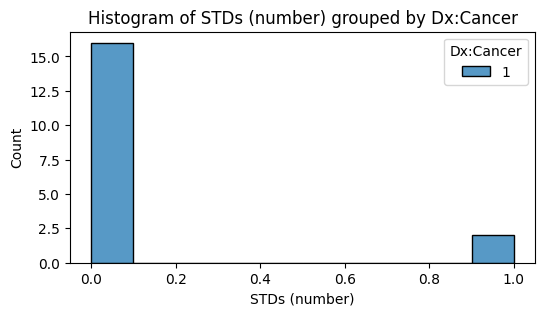

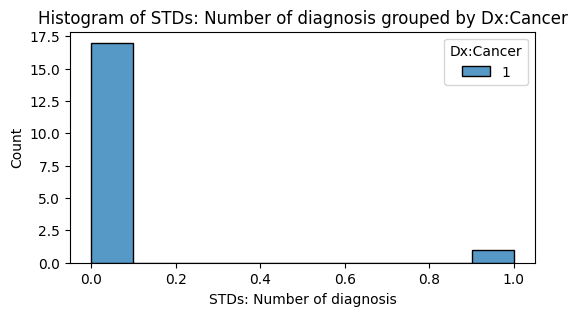

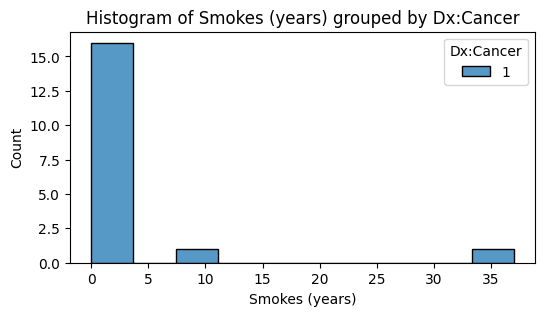

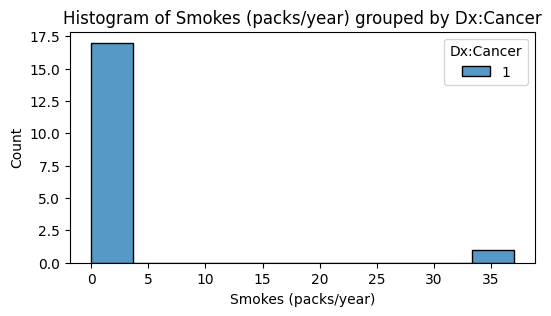

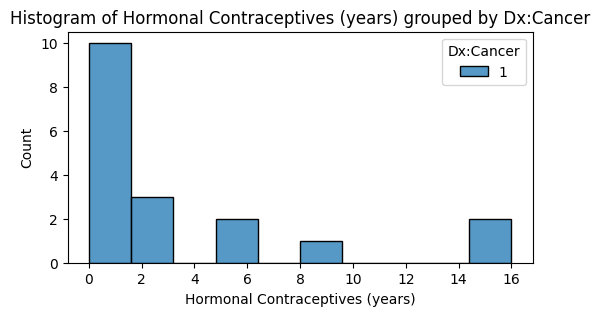

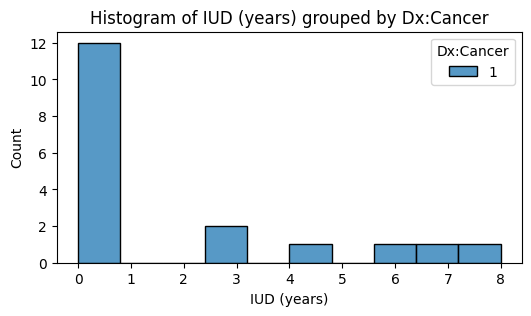

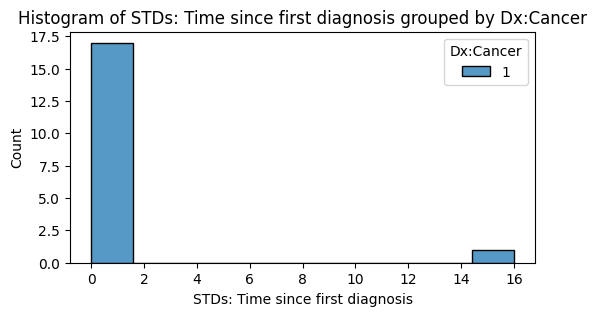

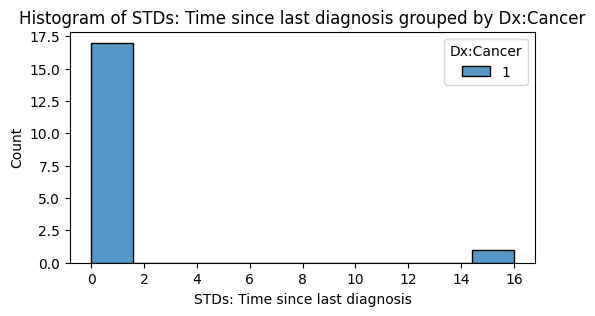

In [31]:
# plotting histogram to determine data distribution (num_cols and duration_cols)
target = "Dx:Cancer"
cols_to_plot = num_cols + duration_cols

for col in cols_to_plot:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=pwc_data, x=col, hue=target, bins=10, kde=False, multiple="dodge")
    plt.title(f"Histogram of {col} grouped by {target}")
    plt.show()


Insight:

### binary cols

from SBS students' research, we can look at `IUD` column to see whether people with cancer did not have IUDs

In [32]:
# creating a function to analyze the binary columns
def binary_plotting(binary_cols):
    for col in binary_cols:
        sns.countplot(data=pwc_data, x=col)
        plt.title(f"Number of Patients with Cancer with {col}")
        plt.xlabel(f"{col} (0 = No, 1 = Yes)")
        plt.ylabel("Count")
        plt.show()

def binary_crosstab(binary_cols):
    for col in binary_cols:
        print(f"cross-tab for {col}")
        print(pd.crosstab(cc_data["Dx:Cancer"], cc_data[col], normalize="index"))
        print(" ")

In [33]:
binary_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
    'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

In [34]:
binary_crosstab(binary_cols)

cross-tab for Smokes
Smokes          0.0       1.0
Dx:Cancer                    
0          0.849127  0.150873
1          0.888889  0.111111
 
cross-tab for Hormonal Contraceptives
Hormonal Contraceptives       0.0       1.0
Dx:Cancer                                  
0                        0.421446  0.578554
1                        0.277778  0.722222
 
cross-tab for IUD
IUD             0.0       1.0
Dx:Cancer                    
0          0.903990  0.096010
1          0.666667  0.333333
 
cross-tab for STDs
STDs            0.0       1.0
Dx:Cancer                    
0          0.903990  0.096010
1          0.888889  0.111111
 
cross-tab for STDs:condylomatosis
STDs:condylomatosis       0.0       1.0
Dx:Cancer                              
0                    0.945137  0.054863
1                    1.000000  0.000000
 
cross-tab for STDs:vaginal condylomatosis
STDs:vaginal condylomatosis       0.0       1.0
Dx:Cancer                                      
0                         

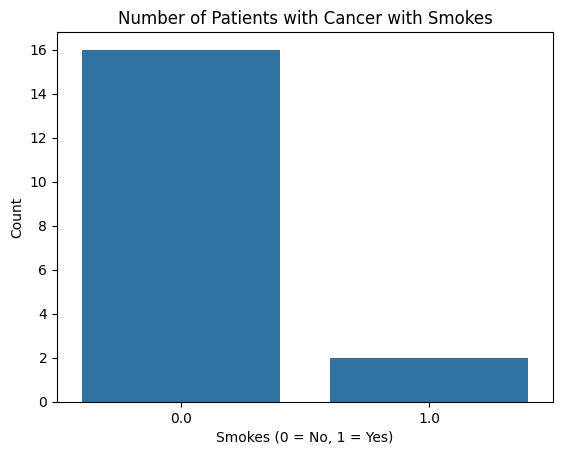

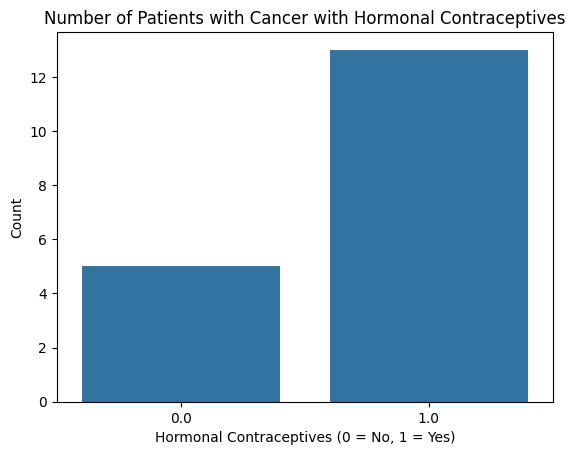

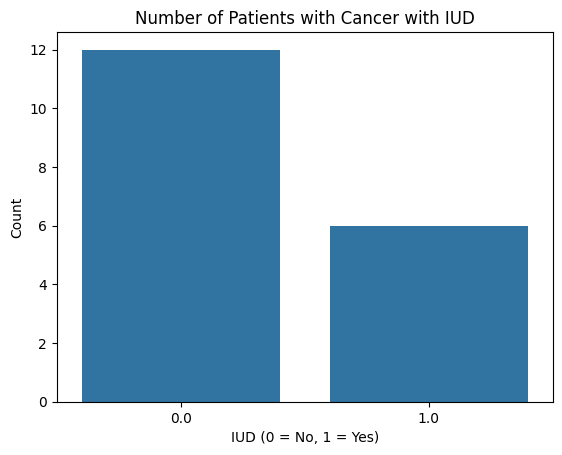

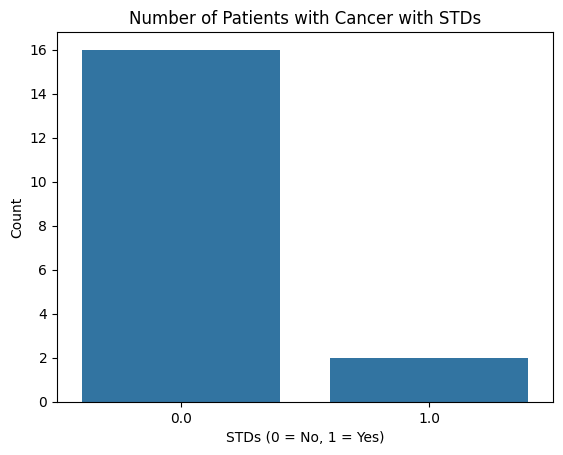

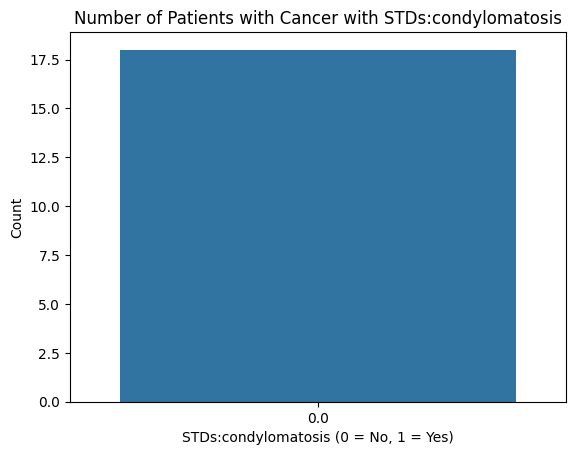

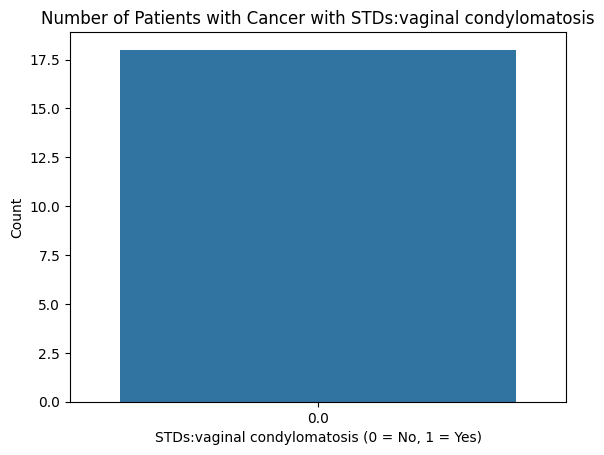

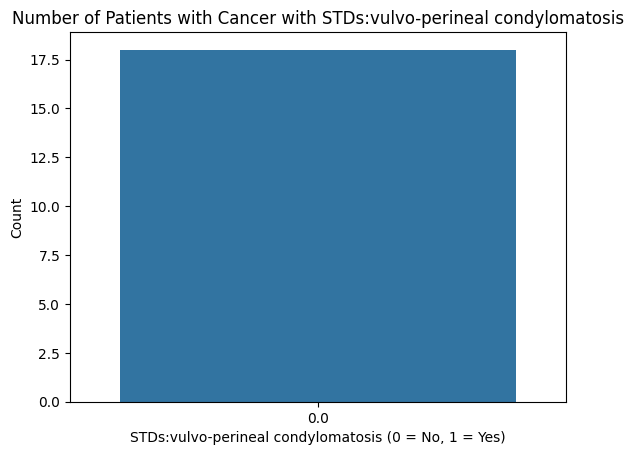

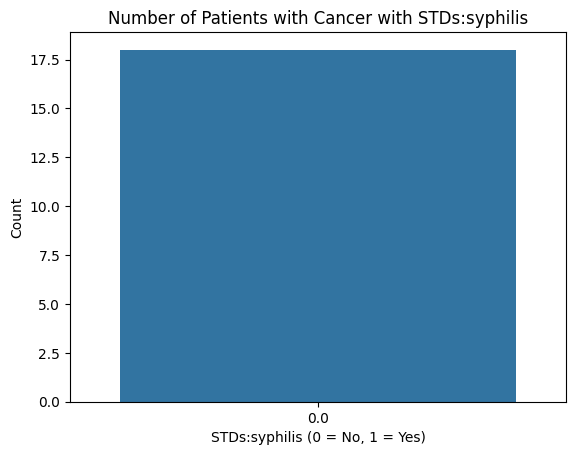

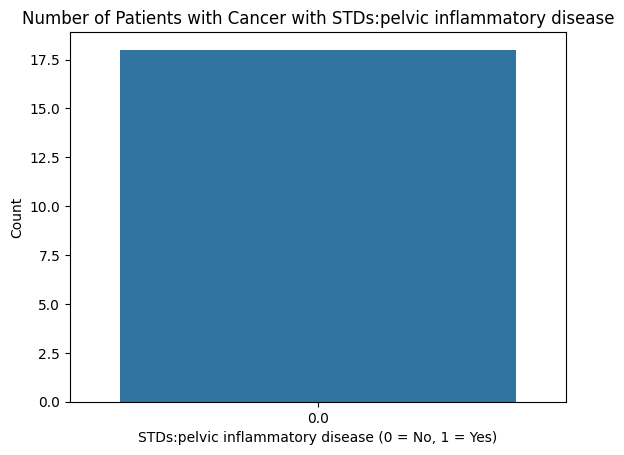

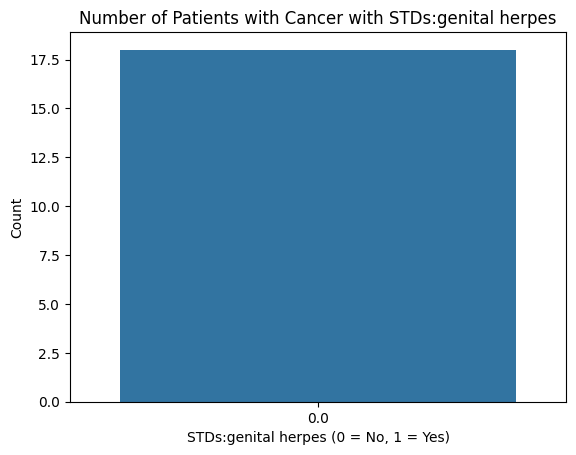

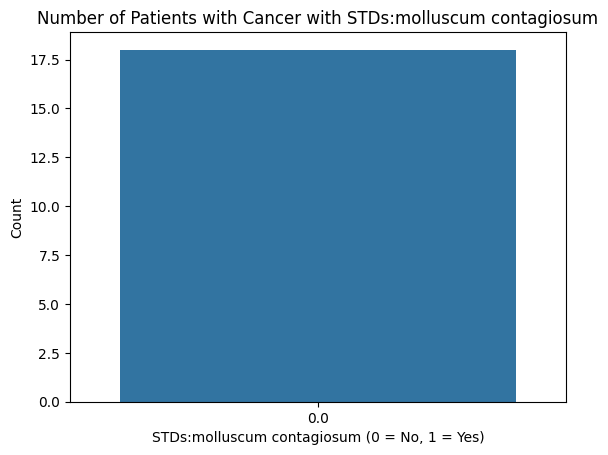

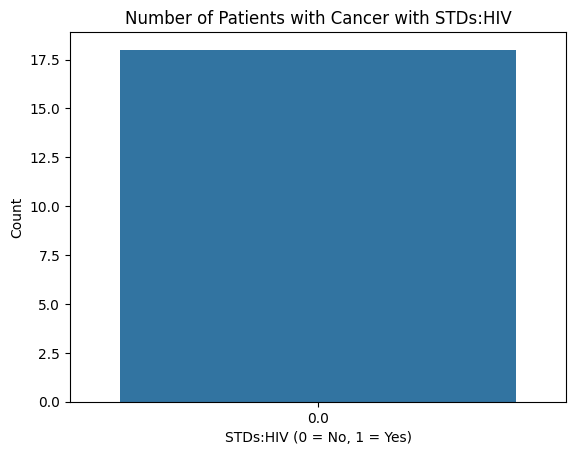

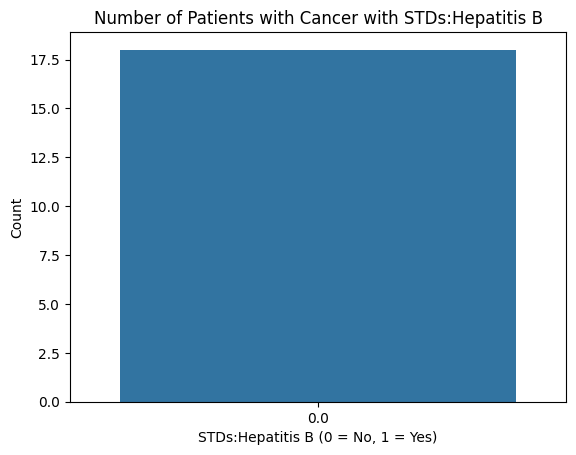

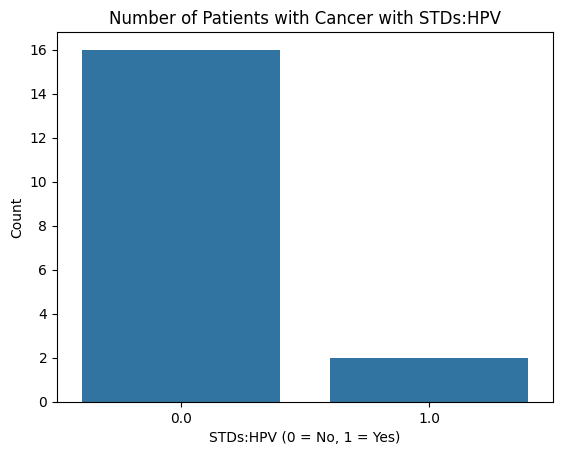

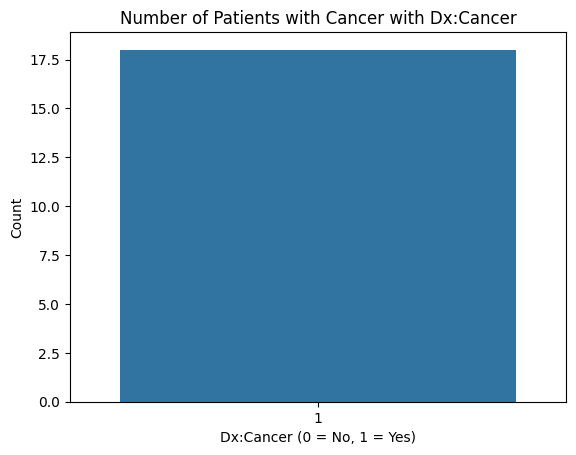

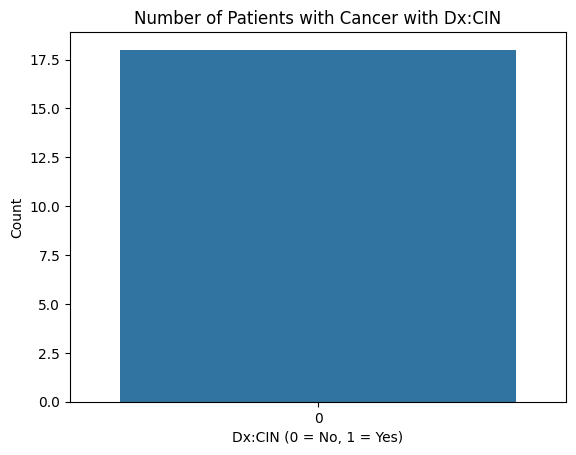

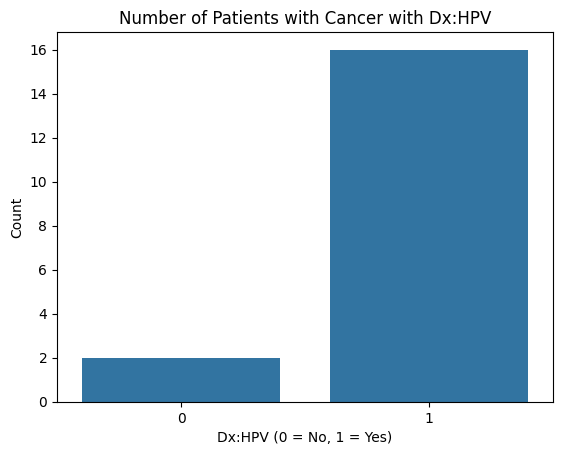

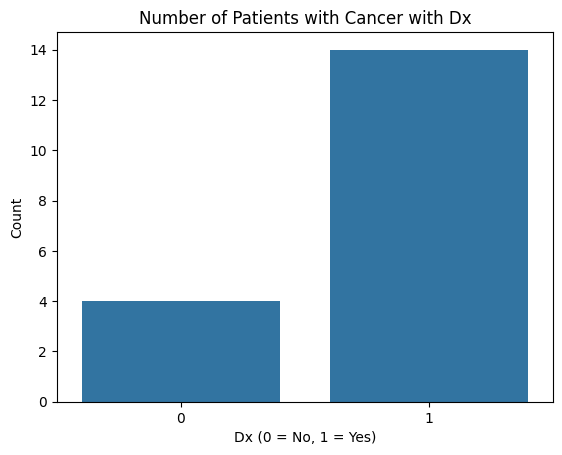

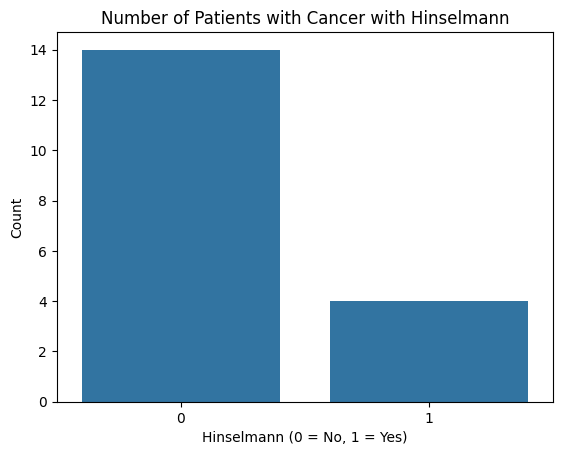

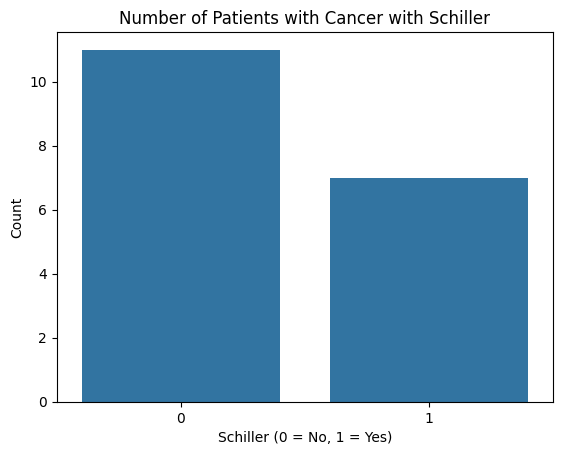

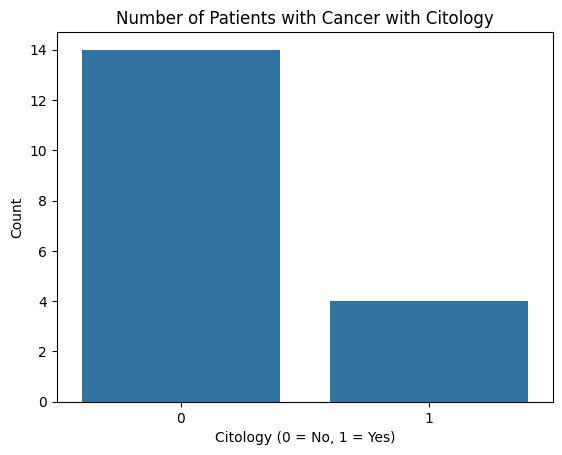

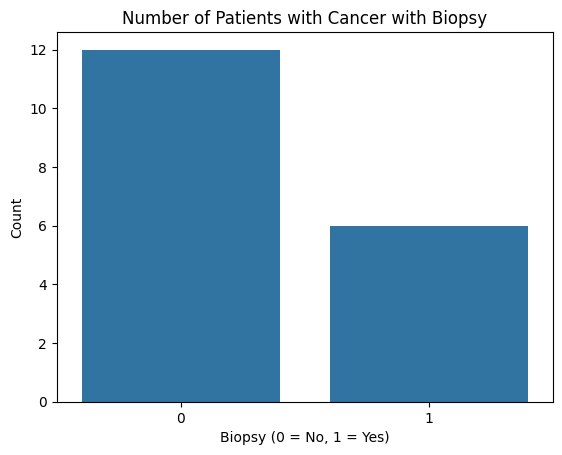

In [35]:
binary_plotting(binary_cols)

In [36]:
import os
print("Current working directory:", os.getcwd())
cc_data.to_csv("cleaned_cervical_cancer.csv", index=False)

Current working directory: C:\Users\Deonne\OneDrive - Nanyang Technological University\Desktop\Y2S1\Biohackathon
